In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
ca = pd.read_excel("/Users/holliknight/Desktop/OneDrive - Prince George's County, Maryland/FirstWatch Data/COVID related/CardiacArrests_2019_2020All.xlsx")

In [5]:
ca.tail()

,Incident #,Time Created,Address/Location,Box#,Final Call Type,Pri,Problem,Free Text Match
4251,PF21011000000085,2021-01-10 07:41:41,9318 EDMONSTON RD,1402,CPR COMBINED,0,CPRC,"[WORKING CODE],[CPR]"
4252,PF21011000000112,2021-01-10 09:20:29,3908 NEWTON ST,5501,WORKING CODE,0,CPR,[CPR]
4253,PF21011000000232,2021-01-10 14:40:27,301 GOLDLEAF AVE,802,CPR COMBINED,0,CPRC,[CPR]
4254,PF21011000000399,2021-01-10 22:04:16,9211 STUART LN,2501,WORKING CODE,0,CPR,"[WORKING CODE],[CPR]"
4255,PF21011000000434,2021-01-10 23:36:52,6710 MALLERY DR,4801,WORKING CODE,0,CPR,[CPR]


In [6]:
ca = ca.sort_values(
    by=['Time Created'], ascending=True)

In [7]:
ca = ca[['Time Created', 'Incident #']]

In [8]:
ca.describe()

,Time Created,Incident #
count,4256,4256
unique,4256,4256
top,2019-10-28 16:20:21,PF20021600000166
freq,1,1
first,2019-01-01 06:59:27,NaN
last,2021-01-10 23:36:52,NaN


In [9]:
ca = ca.drop_duplicates(subset='Incident #', keep="first")

In [10]:
ca.dtypes

Time Created    datetime64[ns]
Incident #              object
dtype: object

In [11]:
ca['Time Created'] = ca['Time Created'].astype(str)

In [12]:
ca[['DateCreated','TimeCreated']] = ca['Time Created'].str.split(' ',expand=True)

In [13]:
ca = ca[['DateCreated', 'Incident #']]

In [14]:
ca.columns = ['DateCreated', 'Cardiac_Incidents']

In [15]:
ca.head()

,DateCreated,Cardiac_Incidents
0,2019-01-01,PF19010100000163
1,2019-01-01,PF19010100000191
2,2019-01-01,PF19010100000193
3,2019-01-01,PF19010100000195
4,2019-01-01,PF19010100000355


In [16]:
ca['DateCreated'] = pd.to_datetime(ca['DateCreated'])
print (ca['DateCreated'].dtype)

datetime64[ns]


In [17]:
ca['Week'] = ca['DateCreated'].dt.week
ca['Year'] = ca['DateCreated'].dt.year

In [18]:
ca = ca.groupby(['Year', 'Week'],as_index=False)["Cardiac_Incidents"].count()

In [21]:
ca.tail()

,Year,Week,Cardiac_Incidents
102,2020,51,60
103,2020,52,42
104,2020,53,42
105,2021,1,46
106,2021,53,19


In [20]:
ca.loc[104,'Cardiac_Incidents'] = 42

In [51]:
pr4 = pd.read_excel("/Users/holliknight/Desktop/OneDrive - Prince George's County, Maryland/FirstWatch Data/COVID related/ePCR_2019_2020All.xlsx")

In [52]:
pr4.tail()

,Time Dispatched,Problem,Priority,EMD Card#,Unit,Incident #,Address/Location,City,Zip,Incident Location Type,Destination,GPS Locations,Disposition,Age,Gender
388055,2021-01-10 23:44:09,Convulsions/Seizure,NaN,NaN,PE830,21011000000437,4700 GARDEN CITY DR,Hyattsville,20785.0,Vehicle,NaN,"38.947952,-76.871955",Canceled on Scene (No Patient Contact),,NaN
388056,2021-01-10 23:49:39,Breathing Problem,NaN,NaN,PA835,21011000000439,RANDOLPH ST / 56TH AVE,Hyattsville,20784.0,Roadways,NaN,"38.938184,-76.922048",Canceled on Scene (No Patient Found),,NaN
388057,2021-01-10 23:49:39,Breathing Problem,NaN,NaN,E809,21011000000439,RANDOLPH ST / 56TH AVE,Hyattsville,20784.0,Roadways,NaN,"38.938184,-76.922048","Standby-Public Safety, Fire, or EMS Operationa...",,NaN
388058,2021-01-10 23:51:03,Abdominal Pain/Problems,Priority 2,NaN,MD812,21011000000440,6215 60TH PL,Riverdale Park,20737.0,Private Residence,Doctors Community Hospital - 329,"38.962537,-76.913801","Patient Treated, Transported by this EMS Unit",64 Years,Female
388059,2021-01-10 23:58:01,Sick Person,Priority 3,NaN,PA826B,21011000000441,2402 LAKEHURST AVE,Forestville,20747.0,Residential Institution,Prince George's Hospital Center (UMCRH) - 232,"38.856211,-76.876022","Patient Treated, Transported by this EMS Unit",36 Years,Female


In [53]:
pr4 = pr4.loc[pr4['Disposition'].str.startswith('Patient Dead', na=False)]

In [54]:
pr4 = pr4[['Time Dispatched', 'Incident #']]

In [55]:
pr4.describe()

,Time Dispatched,Incident #
count,3799,3.799000e+03
unique,3431,3.425000e+03
top,2020-07-18 02:42:08,2.002170e+13
freq,3,3.000000e+00
first,2019-01-01 06:59:27,NaN
last,2021-01-10 23:36:52,NaN


In [56]:
pr4 = pr4.drop_duplicates(subset='Incident #', keep="first")

In [57]:
pr4['Time Dispatched'] = pr4['Time Dispatched'].astype(str)

In [58]:
pr4[['DateCreated','TimeCreated']] = pr4['Time Dispatched'].str.split(' ',expand=True)

In [59]:
pr4 = pr4[['DateCreated', 'Incident #']]
pr4.columns = ['Date', 'Pr4_Incidents']

In [60]:
pr4.describe()

,Date,Pr4_Incidents
count,3425,3425
unique,722,3425
top,2020-04-08,19100700000254
freq,14,1


In [61]:
pr4['Date'] = pd.to_datetime(pr4['Date'])
print (pr4['Date'].dtype)

datetime64[ns]


In [62]:
pr4['Week'] = pr4['Date'].dt.week
pr4['Year'] = pr4['Date'].dt.year

In [63]:
pr4 = pr4.groupby(['Year', 'Week'],as_index=False)["Pr4_Incidents"].count()

In [66]:
pr4.tail()

,Year,Week,Pr4_Incidents
102,2020,51,45
103,2020,52,42
104,2020,53,42
105,2021,1,39
106,2021,53,20


In [65]:
pr4.loc[104,'Pr4_Incidents'] = 42

In [67]:
pr4.describe()

,Year,Week,Pr4_Incidents
count,107.00000,107.000000,107.000000
mean,2019.53271,26.757009,32.196262
std,0.53760,15.502186,10.040897
min,2019.00000,1.000000,1.000000
25%,2019.00000,13.500000,27.000000
50%,2020.00000,27.000000,32.000000
75%,2020.00000,40.000000,36.000000
max,2021.00000,53.000000,62.000000


In [35]:
#pr4.query("Pr4_Incidents == 1")

In [36]:
#pr4.loc[52,'Pr4_Incidents'] = 32

In [68]:
cov = pd.read_excel("/Users/holliknight/Desktop/OneDrive - Prince George's County, Maryland/FirstWatch Data/COVID related/PUI_2020All.xlsx")

In [71]:
cov.shape

(8599, 43)

In [70]:
cov = cov.drop_duplicates(subset='Master_Incident_Number', keep="first")

In [72]:
cov['Time_CallEnteredQueue'] = cov['Time_CallEnteredQueue'].astype(str)

In [73]:
cov = cov[['Time_CallEnteredQueue', 'Master_Incident_Number']]

cov = cov.drop_duplicates(subset='Master_Incident_Number', keep="first")

cov[['DateCreated','TimeCreated']] = cov['Time_CallEnteredQueue'].str.split(' ',expand=True)

cov = cov[['DateCreated', 'Master_Incident_Number']]
cov.columns = ['Date', 'Cov_Incidents']

cov['Date'] = pd.to_datetime(cov['Date'])

#cov['Year'] = cov['Date'].dt.year
#cov['Week'] = cov['Date'].dt.week

In [74]:
cov['Year'] = cov['Date'].dt.year
cov['Week'] = cov['Date'].dt.week

In [75]:
cov = cov.groupby(['Year', 'Week'],as_index=False)["Cov_Incidents"].count()

#cov = cov.sort_values(
    #by=['Year', 'Date'], ascending=True)


In [79]:
cov.tail()

,Year,Week,Cov_Incidents
48,2020,51,268
49,2020,52,282
50,2020,53,253
51,2021,1,259
52,2021,53,115


In [78]:
cov.loc[50,'Cov_Incidents'] = 253

In [82]:
ca['Interval'] = np.arange(len(ca['Year']))

In [83]:
pr4['Interval'] = np.arange(len(pr4['Year']))

In [84]:
ca_pr4 = ca.join(pr4, on='Interval', lsuffix='ca', rsuffix='pr4')

In [85]:
ca_pr4.tail()

,Yearca,Weekca,Cardiac_Incidents,Intervalca,Yearpr4,Weekpr4,Pr4_Incidents,Intervalpr4
102,2020,51,60,102,2020,51,45,102
103,2020,52,42,103,2020,52,42,103
104,2020,53,42,104,2020,53,42,104
105,2021,1,46,105,2021,1,39,105
106,2021,53,19,106,2021,53,20,106


In [86]:
ca_pr4 = ca_pr4[['Yearca','Weekca','Cardiac_Incidents', 'Pr4_Incidents']]

In [87]:
ca_pr4.head()

,Yearca,Weekca,Cardiac_Incidents,Pr4_Incidents
0,2019,1,42,29
1,2019,2,32,29
2,2019,3,33,28
3,2019,4,42,35
4,2019,5,43,35


In [88]:
df = pd.merge(ca_pr4, cov,  how='left', left_on=['Yearca','Weekca'], right_on = ['Year','Week'])

In [89]:
df.head()

,Yearca,Weekca,Cardiac_Incidents,Pr4_Incidents,Year,Week,Cov_Incidents
0,2019,1,42,29,NaN,NaN,NaN
1,2019,2,32,29,NaN,NaN,NaN
2,2019,3,33,28,NaN,NaN,NaN
3,2019,4,42,35,NaN,NaN,NaN
4,2019,5,43,35,NaN,NaN,NaN


In [90]:
df.tail()

,Yearca,Weekca,Cardiac_Incidents,Pr4_Incidents,Year,Week,Cov_Incidents
102,2020,51,60,45,2020.0,51.0,268.0
103,2020,52,42,42,2020.0,52.0,282.0
104,2020,53,42,42,2020.0,53.0,253.0
105,2021,1,46,39,2021.0,1.0,259.0
106,2021,53,19,20,2021.0,53.0,115.0


In [91]:
df.fillna(0, inplace=True)

In [92]:
df = df[['Yearca','Weekca', 'Cardiac_Incidents', 'Pr4_Incidents', 'Cov_Incidents']]

In [98]:
df.tail()

,Year,Week,Cardiac,Pr4,Cov,Interval
102,2020,51,60,45,268.0,102
103,2020,52,42,42,282.0,103
104,2020,53,42,42,253.0,104
105,2021,1,46,39,259.0,105
106,2021,53,19,20,115.0,106


In [95]:
df.columns = ['Year','Week','Cardiac', 'Pr4', 'Cov']

In [96]:
df['Interval'] = np.arange(len(df['Year']))

In [99]:
n=1
df.drop(df.tail(n).index,inplace=True)

In [100]:
df.dtypes

Year          int64
Week          int64
Cardiac       int64
Pr4           int64
Cov         float64
Interval      int64
dtype: object

In [98]:
#dates = (df['Date'] > "2020-11-01")
#small_df = df.loc[dates]

Text(0.5,1,'Priority 4 Incidents')

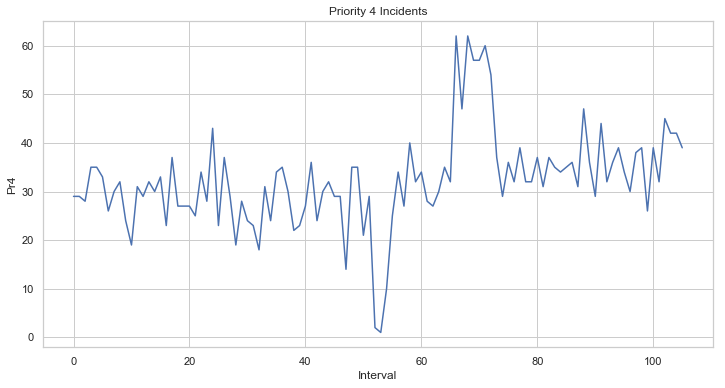

In [111]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (12, 6)

sns.lineplot(x="Interval", y="Pr4", #style="Year",
             data=df)
#plt.ylim(0, 15)
plt.title('Priority 4 Incidents')

Text(0.5,1,'Cardiac Arrest Incidents')

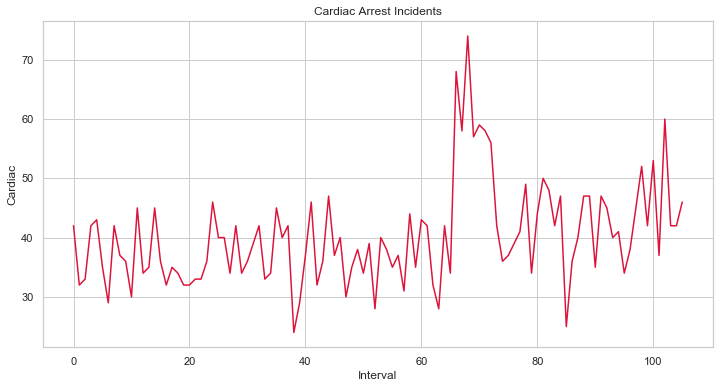

In [112]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (12, 6)

sns.lineplot(x="Interval", y="Cardiac", #style="Year", 
             color="Crimson",
             data=df)
#plt.ylim(0, 15)
plt.title('Cardiac Arrest Incidents')

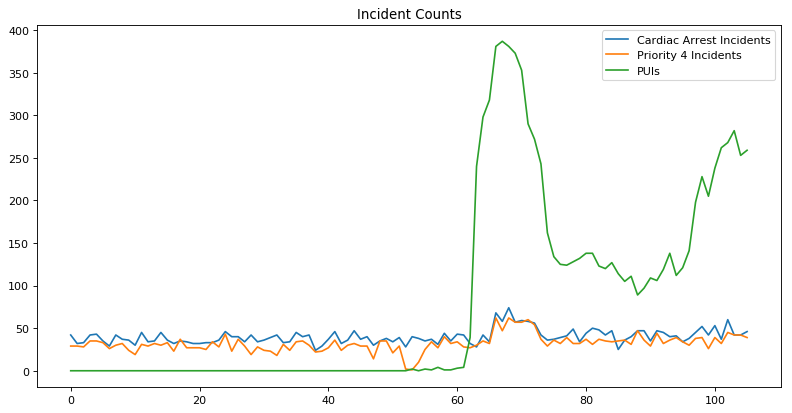

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')


a = df['Interval']
b = df['Cardiac']
plt.plot(a, b)

c = df['Interval']
d = df['Pr4']
plt.plot(c, d)

e = df['Interval']
f = df['Cov']
plt.plot(e, f)


plt.legend(['Cardiac Arrest Incidents', 'Priority 4 Incidents', 'PUIs'])
plt.title('Incident Counts')
#plt.xticks([12, 25, 38, 51, 64, 77, 90], 
           #['2019-Mar','2019-June', '2019-Sept','2019-Dec', '2020-Mar','2020-June', '2020-Oct'])

plt.show()

In [102]:
new_df = df[['Cardiac', 'Pr4', 'Cov']]

In [103]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=['Cardiac', 'Pr4', 'Cov'])

In [107]:
scaled_df.tail()

,Cardiac,Pr4,Cov,Interval
101,-0.372526,-0.031225,1.594962,101
102,2.346689,1.272672,1.647870,102
103,0.218608,0.971773,1.771321,103
104,0.218608,0.971773,1.515601,104
105,0.691515,0.670873,1.568509,105


In [105]:
scaled_df['Interval'] = np.arange(len(scaled_df['Cardiac']))

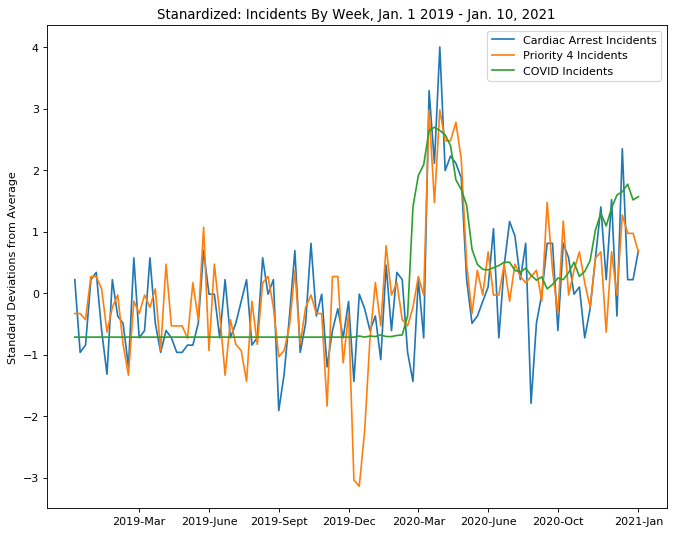

In [108]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


a = scaled_df['Interval']
b = scaled_df['Cardiac']
plt.plot(a, b)

c = scaled_df['Interval']
d = scaled_df['Pr4']
plt.plot(c, d)

e = scaled_df['Interval']
f = scaled_df['Cov']
plt.plot(e, f)


plt.legend(['Cardiac Arrest Incidents', 'Priority 4 Incidents', 'COVID Incidents'])
plt.title('Stanardized: Incidents By Week, Jan. 1 2019 - Jan. 10, 2021')
plt.xticks([12, 25, 38, 51, 64, 77, 90, 105], 
           ['2019-Mar','2019-June', '2019-Sept','2019-Dec', '2020-Mar','2020-June', '2020-Oct', '2021-Jan'])
plt.ylabel('Standard Deviations from Average')


plt.show()

## Cardiac Arrests, Priority 4 Comparison

In [91]:
n=1
ca.drop(ca.tail(n).index,inplace=True)

In [98]:
n=1
pr4.drop(pr4.tail(n).index,inplace=True)

In [99]:
ca20 = ca.loc[ca['Year'] == 2020]
ca19 = ca.loc[ca['Year'] == 2019]

In [100]:
ca20.tail()

,Year,Week,Cardiac_Incidents,Interval
99,2020,48,42,99
100,2020,49,53,100
101,2020,50,37,101
102,2020,51,60,102
103,2020,52,42,103


In [101]:
pr20 = pr4.loc[pr4['Year'] == 2020]
pr19 = pr4.loc[pr4['Year'] == 2019]

In [102]:
pr20.tail()

,Year,Week,Pr4_Incidents,Interval
99,2020,48,26,99
100,2020,49,39,100
101,2020,50,32,101
102,2020,51,45,102
103,2020,52,42,103


In [103]:
CA_avg19 = ca19['Cardiac_Incidents'].mean()
CA_avg20 = ca20['Cardiac_Incidents'].mean()

Pr4_avg19 = pr19['Pr4_Incidents'].mean()
Pr4_avg20 = pr20['Pr4_Incidents'].mean()

In [104]:
print(CA_avg19)
print(CA_avg20)
print(Pr4_avg19)
print(Pr4_avg20)

36.80769230769231
43.34615384615385
28.596153846153847
35.71153846153846


In [105]:
CA_change = (CA_avg20 - CA_avg19)/CA_avg19
Pr4_change = (Pr4_avg20 - Pr4_avg19)/Pr4_avg19

In [106]:
print(CA_change)
print(Pr4_change)

0.17763845350052251
0.2488231338264962


In [118]:
pr = pd.read_excel("/Users/holliknight/Desktop/OneDrive - Prince George's County, Maryland/FirstWatch Data/COVID related/ePCR_2019_2020All.xlsx")

In [119]:
pr.head()

,Time Dispatched,Problem,Priority,EMD Card#,Unit,Incident #,Address/Location,City,Zip,Incident Location Type,Destination,GPS Locations,Disposition,Age,Gender
0,2019-01-01 00:01:05,Unknown Problem/Person Down,NaN,NaN,A826,19010100000001,2323 BARKLEY PL,Forestville,20747.0,Private Residence,NaN,"38.858391,-76.911763","Patient Treated, Released (AMA)",75 Years,Male
1,2019-01-01 00:01:37,Diabetic Problem,NaN,NaN,MD840,19010100000002,11822 PARK WALDORF LA,NaN,NaN,NaN,NaN,NaN,Canceled (Prior to Arrival At Scene),,NaN
2,2019-01-01 00:01:49,Unconscious/Fainting/Near-Fainting,NaN,NaN,A825,19010100000003,7520 SURRATTS RD,Clinton,20735.0,Nursing Home,NaN,"38.751505,-76.875331","Standby-Public Safety, Fire, or EMS Operationa...",,NaN
3,2019-01-01 00:01:49,Unconscious/Fainting/Near-Fainting,NaN,NaN,MD825,19010100000003,7520 SURRATTS RD,Clinton,20735.0,Residential Institution,NaN,"38.751505,-76.875331","Standby-Public Safety, Fire, or EMS Operationa...",,NaN
4,2019-01-01 00:02:00,Unknown Problem/Person Down,NaN,NaN,A823,19010100000004,6547 HIL MAR DR,Forestville,20747.0,Private Residence,NaN,"38.839608,-76.897350","Assist, Public",,NaN
